# HR Analytics Employee Attrition

Q. What is Attrition?
A. Staff attrition refers to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. With attrition, an employer will not fill the vacancy left by the former employee.

# Business Questions 

We would look into why Employee Attrition happend.

1. Better Aspect
2. Worklife and Work Stress 
3. Personal Issues 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as plt
import altair as alt
alt.renderers.enable('html')

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [2]:
df.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [3]:
df.describe().T

count          mean  ...       75%      max
Age                       1470.0     36.923810  ...     43.00     60.0
DailyRate                 1470.0    802.485714  ...   1157.00   1499.0
DistanceFromHome          1470.0      9.192517  ...     14.00     29.0
Education                 1470.0      2.912925  ...      4.00      5.0
EmployeeCount             1470.0      1.000000  ...      1.00      1.0
EmployeeNumber            1470.0   1024.865306  ...   1555.75   2068.0
EnvironmentSatisfaction   1470.0      2.721769  ...      4.00      4.0
HourlyRate                1470.0     65.891156  ...     83.75    100.0
JobInvolvement            1470.0      2.729932  ...      3.00      4.0
JobLevel                  1470.0      2.063946  ...      3.00      5.0
JobSatisfaction           1470.0      2.728571  ...      4.00      4.0
MonthlyIncome             1470.0   6502.931293  ...   8379.00  19999.0
MonthlyRate               1470.0  14313.103401  ...  20461.50  26999.0
NumCompaniesWorked        1470.0      2.693197  ...      4.00      9.0
PercentSalaryHike         1470.0     15.209524  ...     18.00     25.0
PerformanceRating         1470.0      3.153741  ...      3.00      4.0
RelationshipSatisfaction  1470.0      2.712245  ...      4.00      4.0
StandardHours             1470.0     80.000000  ...     80.00     80.0
StockOptionLevel          1470.0      0.793878  ...      1.00      3.0
TotalWorkingYears         1470.0     11.279592  ...     15.00     40.0
TrainingTimesLastYear     1470.0      2.799320  ...      3.00      6.0
WorkLifeBalance           1470.0      2.761224  ...      3.00      4.0
YearsAtCompany            1470.0      7.008163  ...      9.00     40.0
YearsInCurrentRole        1470.0      4.229252  ...      7.00     18.0
YearsSinceLastPromotion   1470.0      2.187755  ...      3.00     15.0
YearsWithCurrManager      1470.0      4.123129  ...      7.00     17.0

[26 rows x 8 columns]

In [4]:
df.describe(include=['object'])

Attrition BusinessTravel  ... Over18 OverTime
count       1470           1470  ...   1470     1470
unique         2              3  ...      1        2
top           No  Travel_Rarely  ...      Y       No
freq        1233           1043  ...   1470     1054

[4 rows x 9 columns]

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)


A Pie Chart to show the number of emoloyee attrited to number of employee not attrited

No     1233
Yes     237
Name: Attrition, dtype: int64


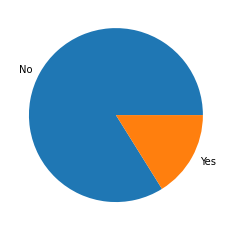

In [6]:
#Attrition count|
attrition_count = df['Attrition'].value_counts()
print(attrition_count)

#ploting the Attrition Count
plt.pie(attrition_count,labels=['No','Yes']);

In [7]:
#Employee that attrited
emp_attrited = pd.DataFrame(df[df['Attrition'] == 'Yes'])
emp_not_attrited = pd.DataFrame(df[df['Attrition'] == 'No'])
print(emp_attrited.shape)
print(emp_not_attrited.shape)

(237, 31)
(1233, 31)


#**Attrition for Better Aspect based upon Department** 

A visualization is done to show how people are attrited on basis of their Department.

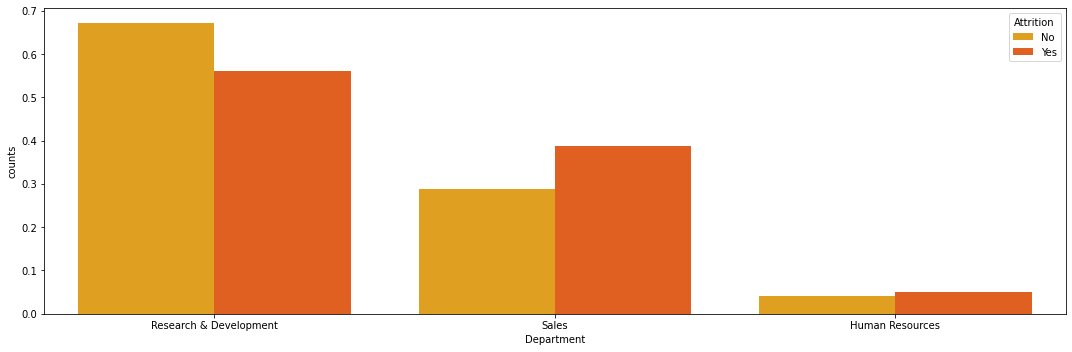

In [8]:
#Hypothesis1: Based on Department

group = (df.groupby(['Attrition'])
         ['Department'].value_counts(normalize=True)
         .reset_index(name='counts')
        )

fig = plt.figure(figsize=(15,5))
sns.barplot(data=group, x='Department', y='counts', hue='Attrition', palette = "autumn_r");
plt.tight_layout()

From the above graph, it can be noted that employees from Sales have higher rate of attrition when compared to other Departments. 

#Better Aspect 

Factors 


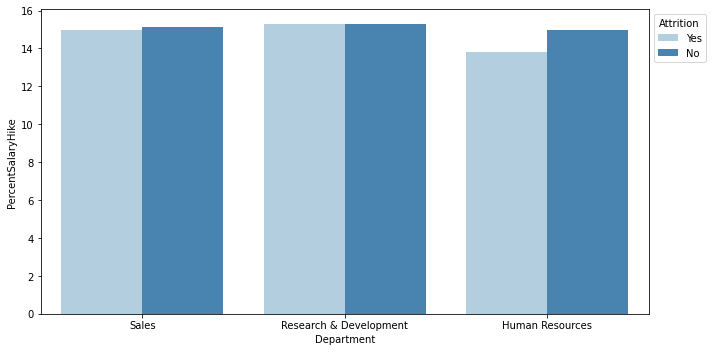

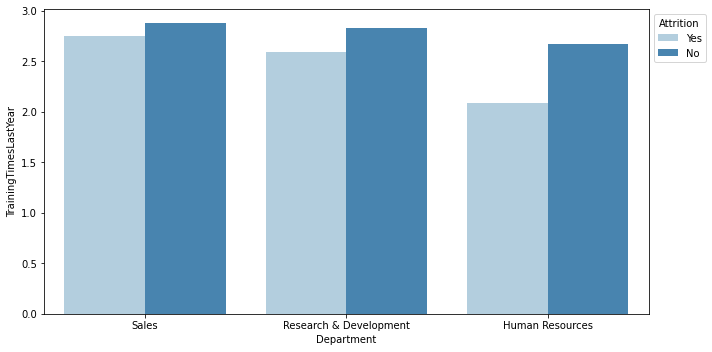

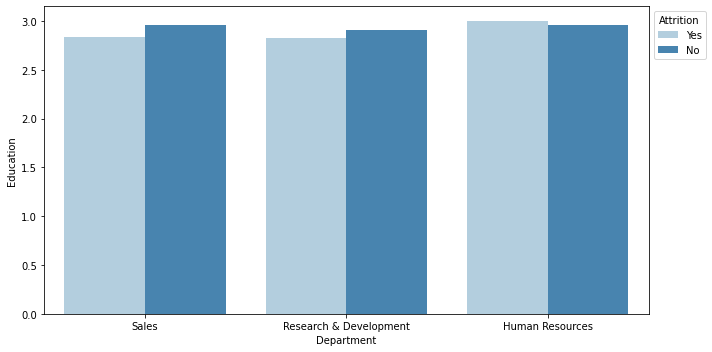

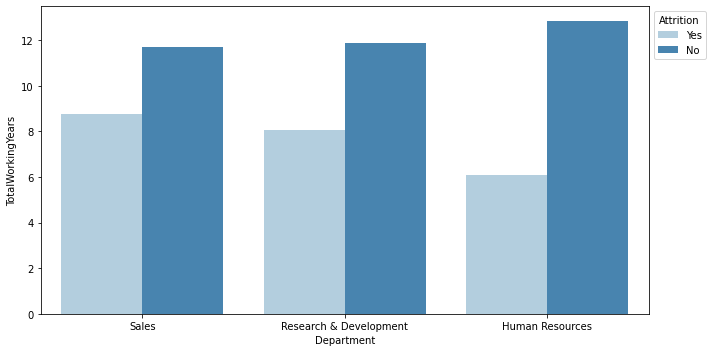

In [9]:
#Factors
dep_cols = df[['PercentSalaryHike', 'TrainingTimesLastYear', 'Education', 'TotalWorkingYears']]
for items in dep_cols:
    plt.figure(figsize=(10,5))
    sns.barplot(x = "Department", y = items, hue = "Attrition", data = df, palette = "Blues", ci=None)
    plt.legend(bbox_to_anchor=(1,1), title="Attrition")
    plt.tight_layout()



**Inference** 

* The Total Working Years and Training Times Last Year are comparatively less for employees who are attrited. 

* Is Salary Hike releated to Work Experience?.

* Does Education has a relationship with Training Time?





**Relationship between Education and Training Time**

***NOTE:*** Click on the legend to view individual Department




In [10]:
#Bar to find relationshp between Education and Trainng Time
click=alt.selection_multi(encodings=['color'])

bar=alt.Chart(df).mark_area(opacity=0.5).encode(
    x='Education',
    y='average(TrainingTimesLastYear)',
    color=alt.Color('Department:N', legend=None),
    column='Attrition').transform_filter(click)

legend = alt.Chart(df).mark_point().encode(
y='Department',
color=alt.condition(click,'Department',alt.value('lightgray'),legend=None)
).properties(selection=click)

bar|legend

alt.HConcatChart(...)

**Relatinship between Salary Hike and Experience**

***NOTE:*** Click on the legend to view individual Department

In [11]:
#Heatmap to find realtionship between Salary Hike and Experience

click=alt.selection_multi(encodings=['color'])

bar=alt.Chart(df).mark_point().encode(
    x=alt.X('PercentSalaryHike', bin=False),
    y=alt.Y('average(TotalWorkingYears)', bin=False),
    color=alt.Color('Department:N', legend=None),
    column='Attrition').transform_filter(click)

legend = alt.Chart(df).mark_point().encode(
y='Department',
color=alt.condition(click,'Department',alt.value('lightgray'),legend=None)
).properties(selection=click)

bar|legend

alt.HConcatChart(...)

**Inference**

* Employees with higher ediucation are who were attrited were trained frequently when compared to the others. 
* The ones who were attrited were less expericed and their salaray hike was higher when compared to the ones who are not attrited. 

**CONCLUSION**

It can be noted that the the employees from the above departments who attrited were less experienced and had lesser education. 



---



---



# Attrition due to Work Aspect based on Job Role

A visualization is done to show how people are attrited based on Jobe Role.

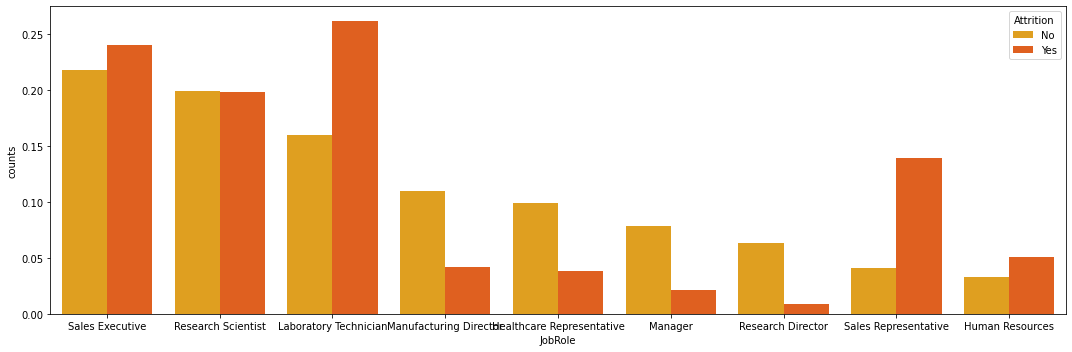

In [12]:
#Based on JobRole


group = (df.groupby(['Attrition'])
         ['JobRole'].value_counts(normalize=True)
         .reset_index(name='counts')
        )

fig = plt.figure(figsize=(15,5))
sns.barplot(data=group, x='JobRole', y='counts', hue='Attrition', palette = "autumn_r");
plt.tight_layout()



The work aspect is analyzed using 2 different factors:

* Internal Factors: Factors which led to attrition due issues with the job role. (MonthlyIncome, JobInvolvement, JobSatisfaction, PerformanceRating, JobLevel).

* External Factors: Factors which led to attrition when the employee is not satisfied with environment. (RelationshipSatisfaction, YearsSinceLastPromotion, YearsWithCurrManager, YearsInCurrentRole, EnvironmentSatisfaction, Age).

**Internal Aspects**

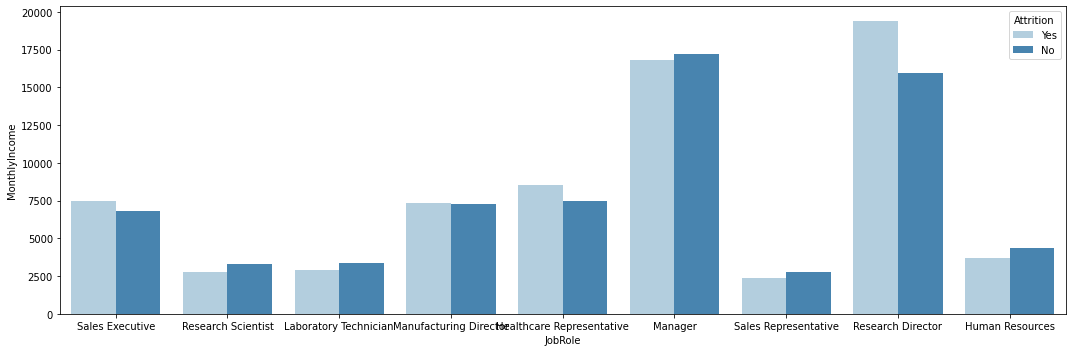

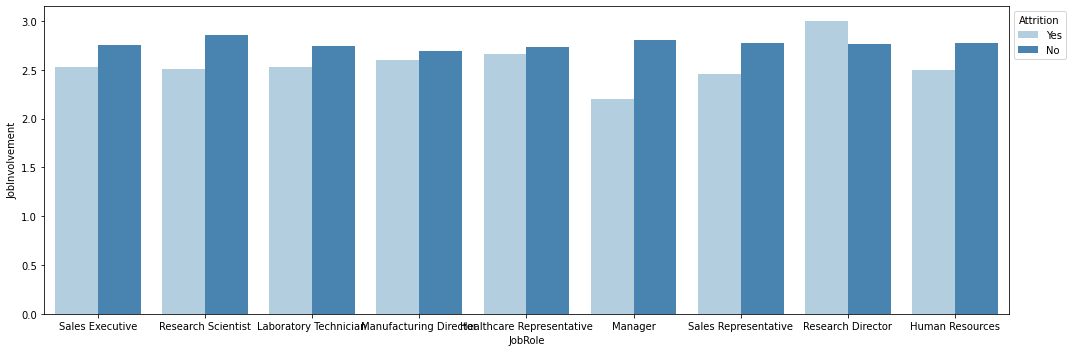

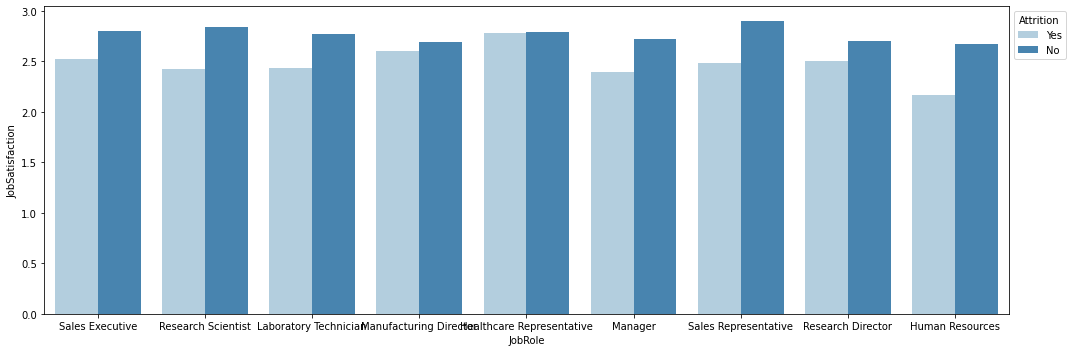

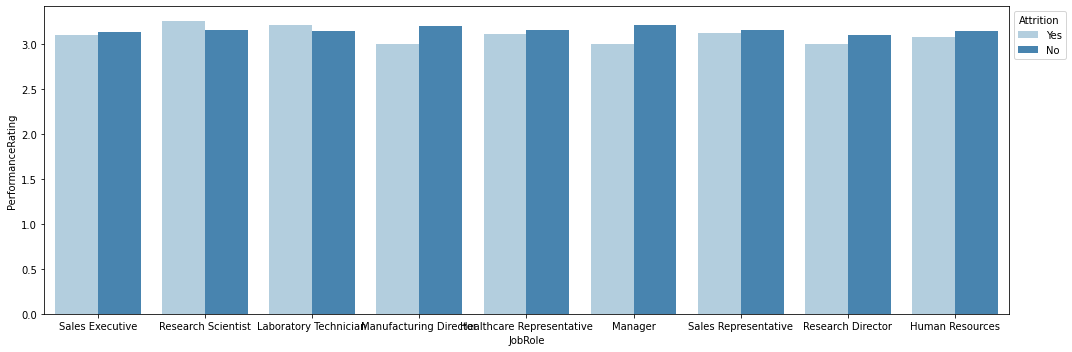

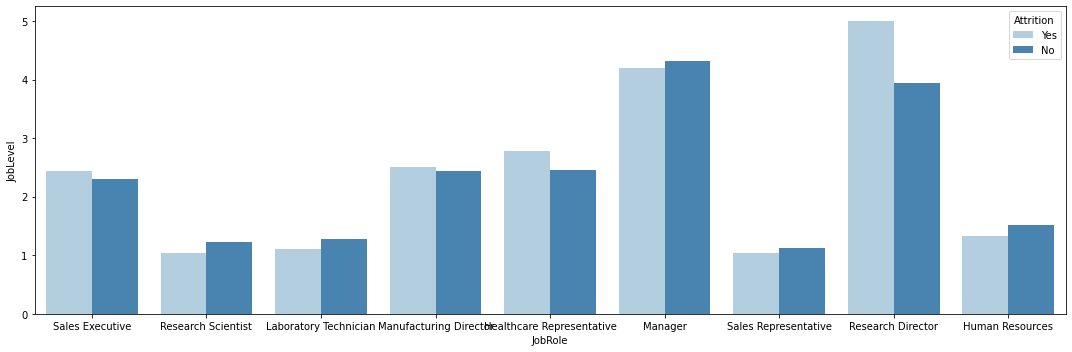

In [13]:
#Internal Aspect
jobrole_cols_internal = df[['MonthlyIncome', 'JobInvolvement', 'JobSatisfaction', 
                            'PerformanceRating', 'JobLevel']]

for items in jobrole_cols_internal:
    plt.figure(figsize=(15,5))
    sns.barplot(x = "JobRole", y = items, hue = "Attrition", data = df, palette = "Blues", ci=None);  
    plt.legend(bbox_to_anchor=(1,1), title="Attrition")
    plt.tight_layout()


**Inference**

* The Job Involvement for the ones who left is lower than for the ones who stayed. 

* The employees who are attrited were not satisfied with their job.

* How Performance Rating play any role in the Income?

* Does Performance Rating has any relatonship with the Job Level?

**Relationship between Performance Rating and Monthly Income**

***NOTE:*** Click on the legend to view each Job Role

In [14]:
#Performance Rating and Monthly Income
click = alt.selection_multi(encodings=['color'])

chart=alt.Chart(df).mark_bar().encode(
    x='average(MonthlyIncome)',
    y='PerformanceRating',
    color=alt.Color('JobRole', legend=None),
    column=('Attrition')
).transform_filter(click)

legend = alt.Chart(df).mark_point().encode(
    y='JobRole',
    color=alt.condition(click, 'JobRole',alt.value('lightgray'), legend=None)
).properties(selection=click)

chart|legend

alt.HConcatChart(...)

**Relationship between Job Level and Performance Rating**

***NOTE:*** Click on the legend to view each Job Role.

In [15]:
click = alt.selection_multi(encodings=['color'])

chart=alt.Chart(df).mark_bar().encode(
    x='average(JobLevel)',
    y='PerformanceRating',
    color=alt.Color('JobRole:N', legend=None),
    column=('Attrition')
).transform_filter(click)

legend = alt.Chart(df).mark_point().encode(
    y='JobRole',
    color=alt.condition(click, 'JobRole',alt.value('lightgray'), legend=None)
).properties(selection=click)

chart|legend

alt.HConcatChart(...)

**Inference**

We can understand that Research Directors and Sales Executives who are attrited were of higher Job Level and paid better. 


**External Aspect**

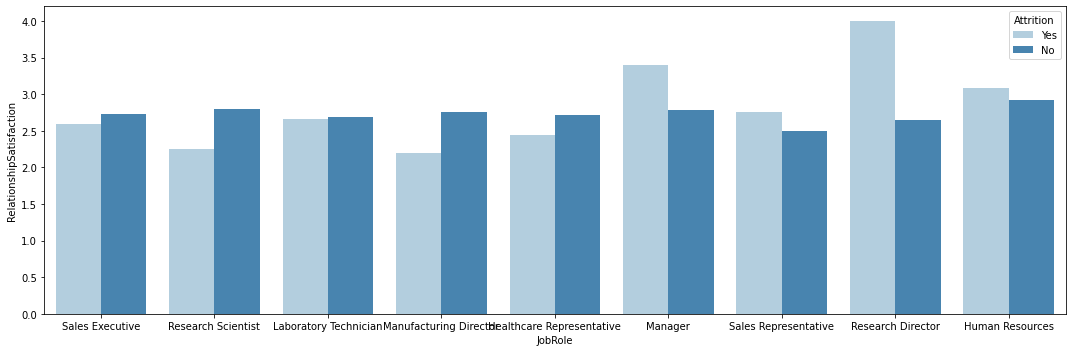

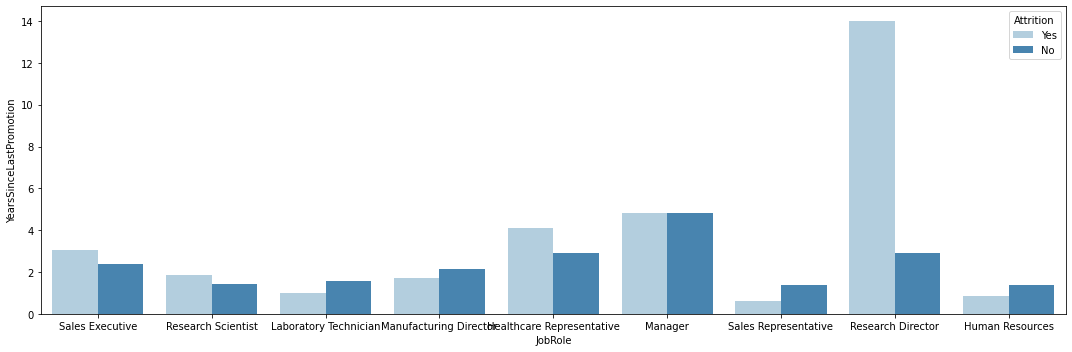

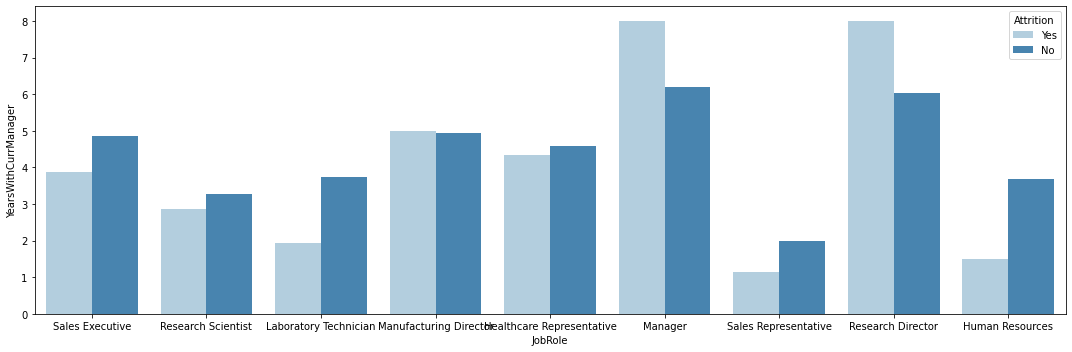

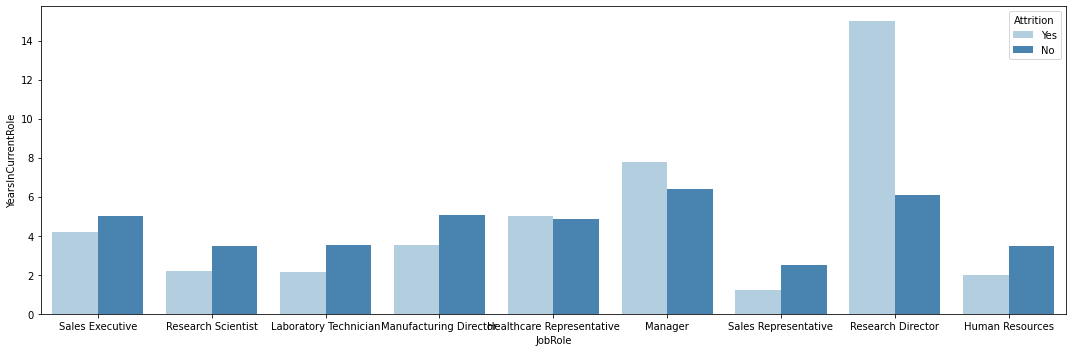

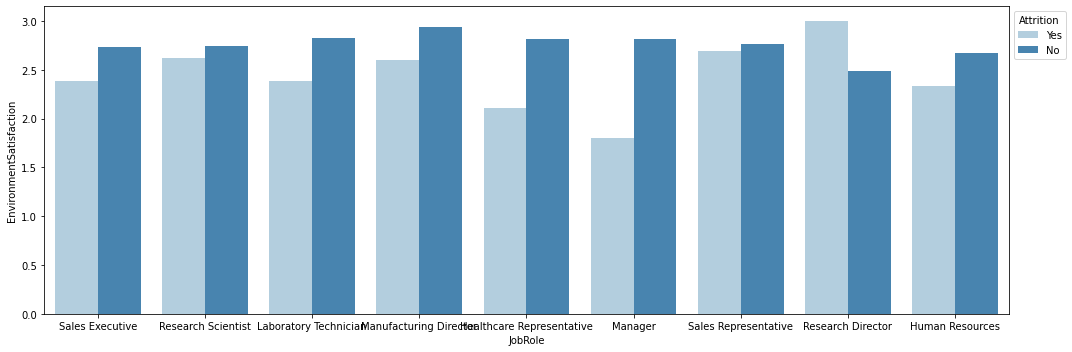

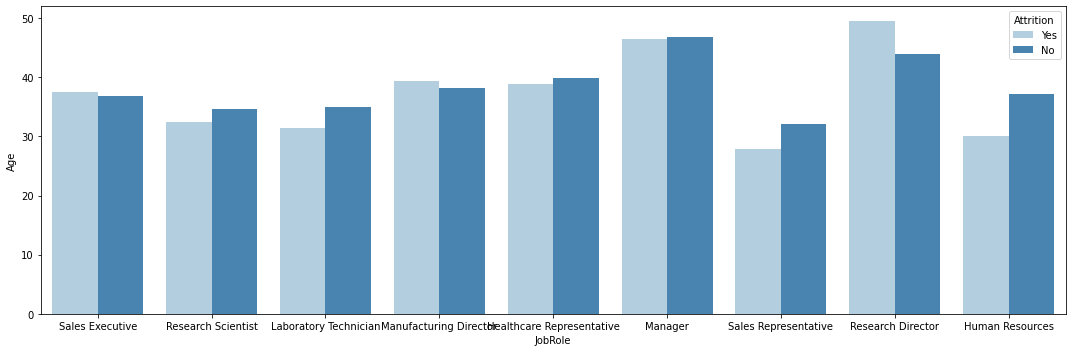

In [16]:
#Work Aspect External Factor

jobrole_cols_internal = df[['RelationshipSatisfaction', 'YearsSinceLastPromotion',
                            'YearsWithCurrManager', 'YearsInCurrentRole', 'EnvironmentSatisfaction', 'Age']]

for items in jobrole_cols_internal:
    plt.figure(figsize=(15,5))
    sns.barplot(x = "JobRole", y = items, hue = "Attrition", data = df, palette = "Blues", ci=None);
    plt.legend(bbox_to_anchor=(1,1), title="Attrition")
    plt.tight_layout()


**Inference**

* Research Director have higher bars for every aspect which is analyzed below.

**Years Since Last Promotion and Age**

***NOTE:*** Click on legend to view each Job Role

In [17]:
click = alt.selection_multi(encodings=['color'])

chart=alt.Chart(df).mark_line().encode(
    x='YearsSinceLastPromotion',
    y='average(Age)',
    color=alt.Color('JobRole', legend=None),
    column=('Attrition')
).transform_filter(click)

legend = alt.Chart(df).mark_point().encode(
    y='JobRole',
    color=alt.condition(click, 'JobRole',alt.value('lightgray'), legend=None)
).properties(selection=click)

chart|legend

#Manager, Manufacturing Director, 

alt.HConcatChart(...)

**CONCLUSION**

* From the above graphs we can conclude that Research Directors and Sales Executives who even after being paid well and higher Job Level had attrited were dissatisfied with their Job. 

* Research Direcctors average age would be aroud 50 as mean of the line is closer to 50. This would suggest that Research Directors might have retired and left rather being dissatisfied.

* While for other Job Role factors like Perfromance Rating, Job Level, Promotion and other internal and External Factors were lesser than the ones who stayed.


---



---



# Other Factors

The other factors the employee's issues releated to his personal life.



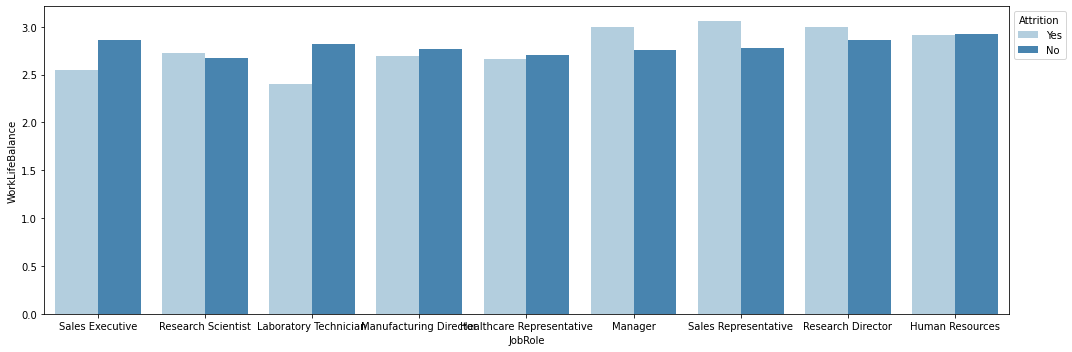

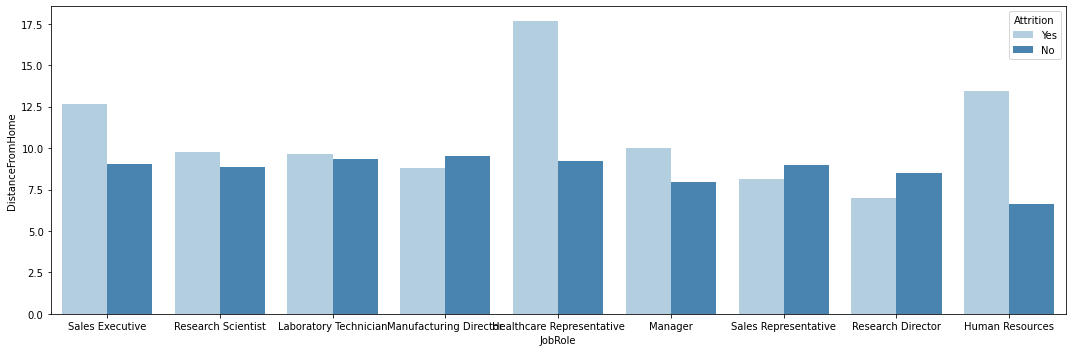

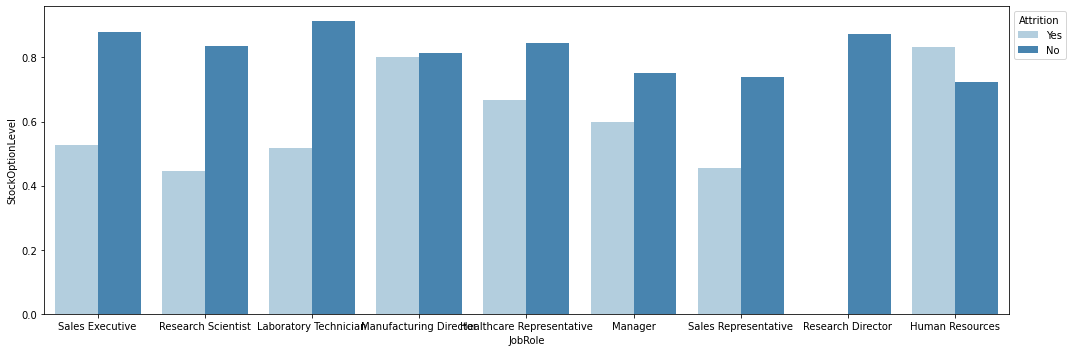

In [18]:
#Personal Aspect

personal_cols = df[['WorkLifeBalance','DistanceFromHome', 'StockOptionLevel']]

for items in personal_cols:
    plt.figure(figsize=(15,5))
    sns.barplot(x = "JobRole", y = items, hue = "Attrition", data = df, palette = "Blues", ci=None);
    plt.legend(bbox_to_anchor=(1,1), title="Attrition")
    plt.tight_layout()


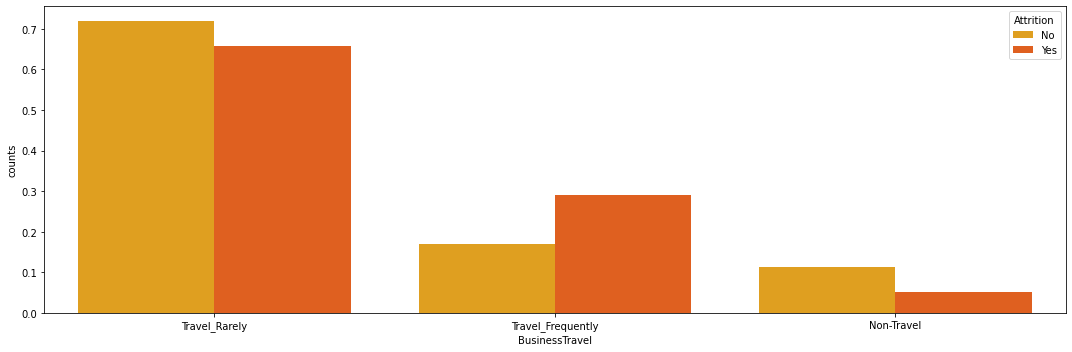

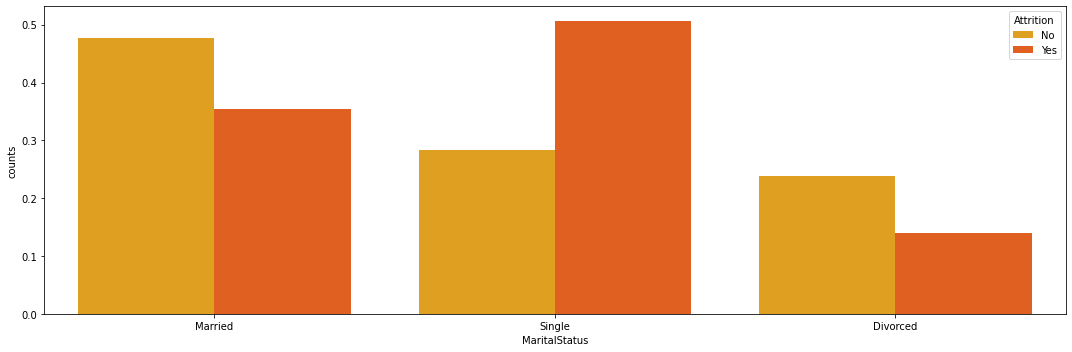

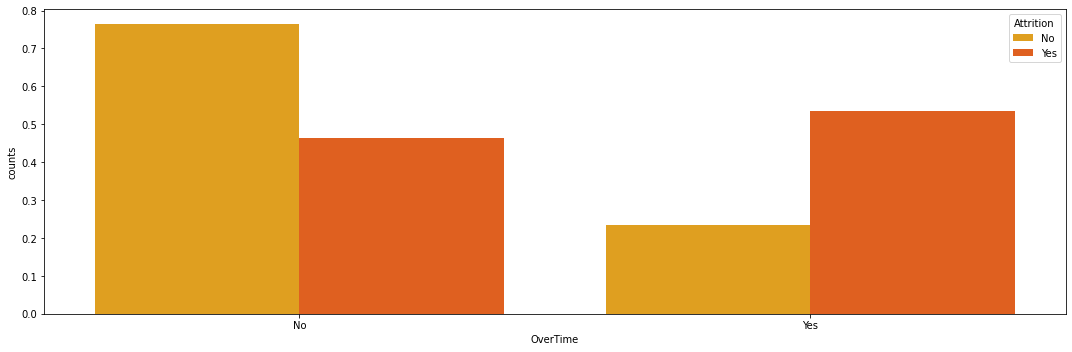

In [19]:
#Other Factors
cols = df[['BusinessTravel', 'MaritalStatus', 'OverTime']]

for items in cols:
  group = (df.groupby(['Attrition'])
         [items].value_counts(normalize=True)
         .reset_index(name='counts')
        )

  fig = plt.figure(figsize=(15,5))
  sns.barplot(data=group, x=items, y='counts', hue='Attrition', palette = "autumn_r");
  plt.tight_layout()
  
  

**Inference**


* It can be inferred that employees who are Single left the Job.
* Employees who were doing overtime attrited. 
* The ones who left the Job traveled more frequently. 
* People who had Stock in the company stayed.
* The ones who left the job had to travel more for work. 



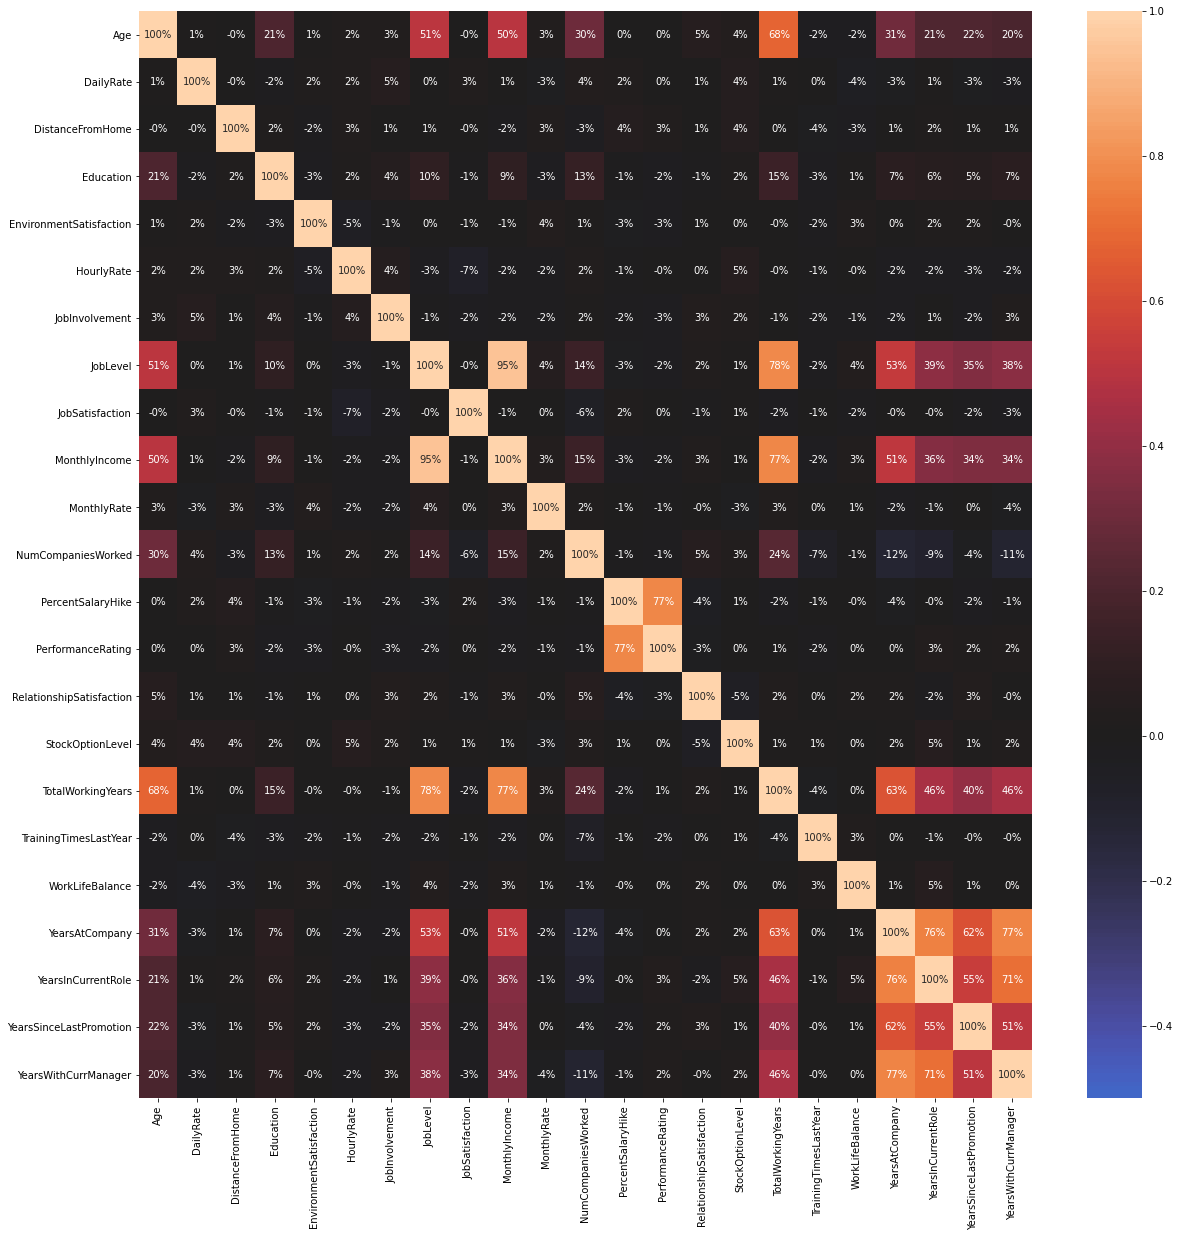

In [20]:
#Correlation Matrix
fig = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, fmt = '.0%', vmin=-0.5, vmax=1, center= 0);

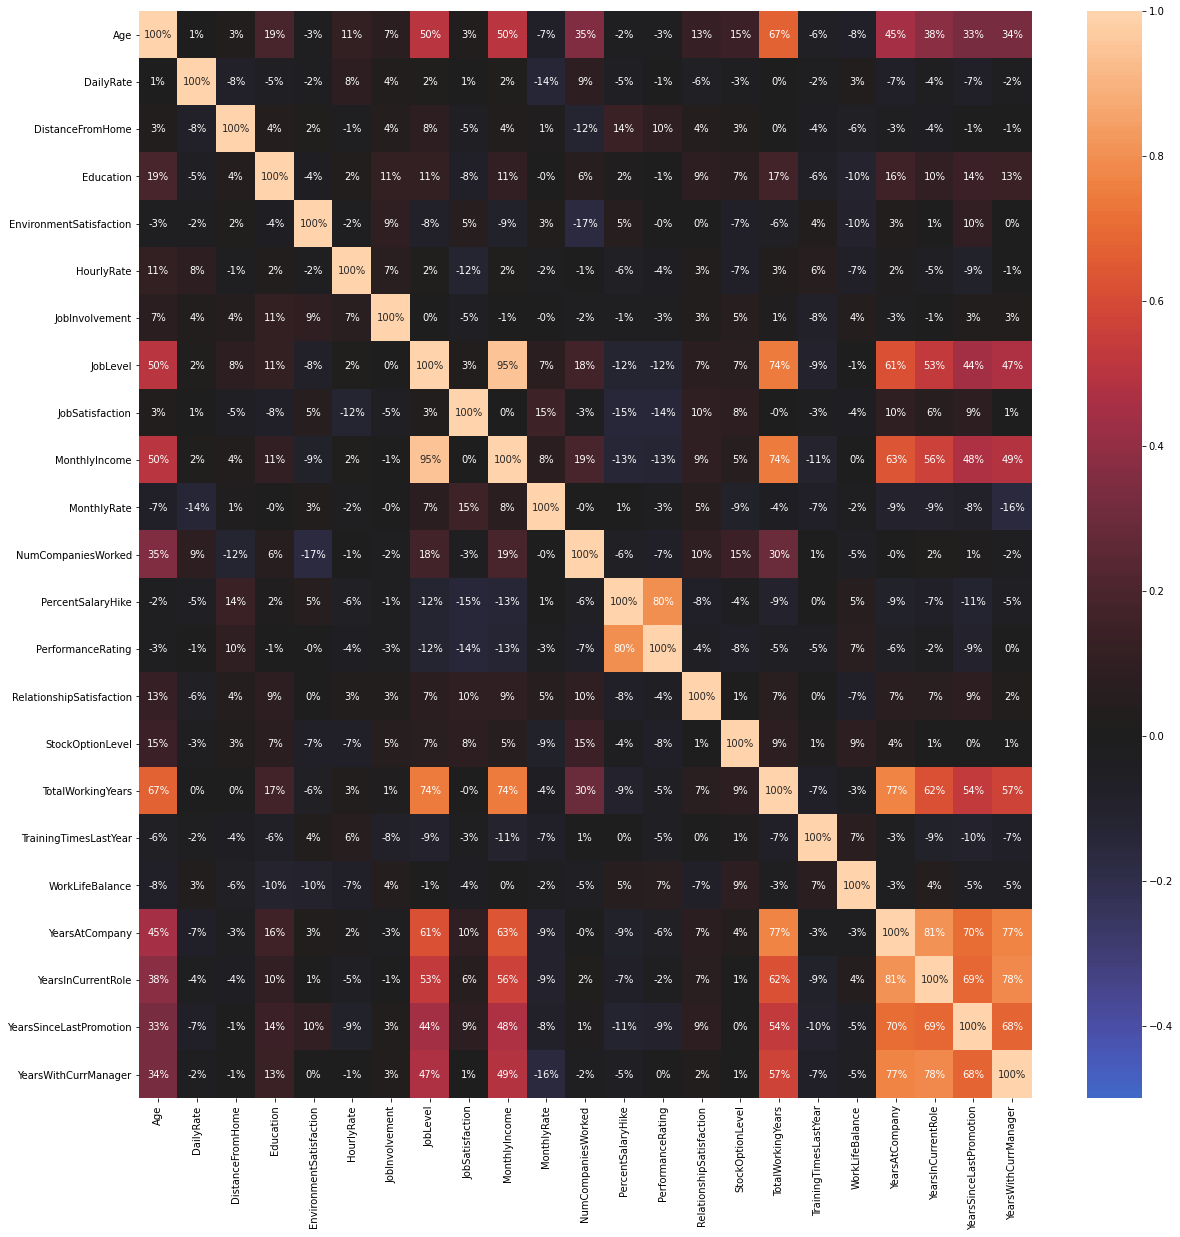

In [21]:
#Correlation Matrix for Attrited
fig = plt.figure(figsize=(20,20))
sns.heatmap(emp_attrited.corr(), annot = True, fmt = '.0%', vmin=-0.5, vmax=1, center= 0);

# Applying Machine Learning

In [22]:
#Transform the data 
#Converting Categorical to number type

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


for column in df.columns:
  if df[column].dtype == np.number:
    continue 
  df[column] = LabelEncoder().fit_transform(df[column])



In [23]:
#Create new Column 
df['Age Years'] = df['Age']
#Dropping the Age Column
df = df.drop('Age', axis = 1)


In [24]:
df.head()

Attrition  BusinessTravel  ...  YearsWithCurrManager  Age Years
0          1               2  ...                     5         23
1          0               1  ...                     7         31
2          1               2  ...                     0         19
3          0               1  ...                     0         15
4          0               2  ...                     2          9

[5 rows x 31 columns]

In [25]:
X = df.iloc[:, 1:df.shape[1]].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
def print_model(model, X_train, X_test, y_train, y_test, train = True):
  if train:
    prediction = model.predict(X_train)
    print("TRAINING SCORE\n")

    print(f"ACCURACY SCORE : {accuracy_score(y_train, prediction) * 100:.2f}%")
    print(f"PERCISION SCORE : {precision_score(y_train, prediction) * 100:.2f}%")
    print(f"F1 SCORE : {f1_score(y_train, prediction) * 100:.2f}%")
    print(f"RECALL SCORE : {recall_score(y_train, prediction) * 100:.2f}%")
    print(f"CONFUSION MATRIX :\n {confusion_matrix(y_train, prediction)}")

  elif train == False:
    prediction = model.predict(X_test)
    print("\nTESTING SCORE\n")

    print(f"ACCURACY SCORE : {accuracy_score(y_test, prediction) * 100:.2f}%")
    print(f"PERCISION SCORE : {precision_score(y_test, prediction) * 100:.2f}%")
    print(f"F1 SCORE : {f1_score(y_test, prediction) * 100:.2f}%")
    print(f"RECALL SCORE : {recall_score(y_test, prediction) * 100:.2f}%")
    print(f"CONFUSION MATRIX :\n {confusion_matrix(y_test, prediction)}")


# Random Forest 

In [27]:

rd_forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
rd_forest.fit(X_train, y_train)

print_model(rd_forest, X_train, X_test, y_train, y_test, train = True)
print_model(rd_forest, X_train, X_test, y_train, y_test, train = False)



TRAINING SCORE

ACCURACY SCORE : 98.38%
PERCISION SCORE : 100.00%
F1 SCORE : 94.68%
RECALL SCORE : 89.89%
CONFUSION MATRIX :
 [[988   0]
 [ 19 169]]

TESTING SCORE

ACCURACY SCORE : 84.01%
PERCISION SCORE : 60.00%
F1 SCORE : 20.34%
RECALL SCORE : 12.24%
CONFUSION MATRIX :
 [[241   4]
 [ 43   6]]


# XGBoost 

In [28]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_model(rd_forest, X_train, X_test, y_train, y_test, train = True)
print_model(rd_forest, X_train, X_test, y_train, y_test, train = False)

TRAINING SCORE

ACCURACY SCORE : 98.38%
PERCISION SCORE : 100.00%
F1 SCORE : 94.68%
RECALL SCORE : 89.89%
CONFUSION MATRIX :
 [[988   0]
 [ 19 169]]

TESTING SCORE

ACCURACY SCORE : 84.01%
PERCISION SCORE : 60.00%
F1 SCORE : 20.34%
RECALL SCORE : 12.24%
CONFUSION MATRIX :
 [[241   4]
 [ 43   6]]


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)


print_model(lr_clf, X_train, X_test, y_train, y_test, train = True)
print_model(lr_clf, X_train, X_test, y_train, y_test, train = False)

TRAINING SCORE

ACCURACY SCORE : 87.84%
PERCISION SCORE : 73.20%
F1 SCORE : 49.82%
RECALL SCORE : 37.77%
CONFUSION MATRIX :
 [[962  26]
 [117  71]]

TESTING SCORE

ACCURACY SCORE : 88.10%
PERCISION SCORE : 79.17%
F1 SCORE : 52.05%
RECALL SCORE : 38.78%
CONFUSION MATRIX :
 [[240   5]
 [ 30  19]]
